In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
import pandas as pd
from IPython.display import display
dict = {"one":pd.Series([1,2,3], index=["a", 'b', 'c']), "two":pd.Series([4,5,6,7], index=["a","b","c", "d"])}
df = pd.DataFrame.from_dict(dict)
display(df.fillna(0))

row = df.iloc[1]
df.add(row, axis=1)

display(df.loc["a"])


,one,two
a,1.0,4
b,2.0,5
c,3.0,6
d,0.0,7


one    1.0
two    4.0
Name: a, dtype: float64

In [3]:
def split_name(df):
    def get_names(full_name):
        f_name, l_name = full_name.split()
        return pd.Series( (f_name, l_name), 
                          index=["First Name", "Last Name"])
    names = df["Contact"].apply(get_names)
    df[names.columns] = names
    return df

In [4]:
arr_3 = np.random.randint(10, 50, size=(2,3))
df = pd.DataFrame(arr_3, ['A', 'B'], ['C','D','E'])


df.rename(columns={'C':"Men", 'D':"Women"})

,Men,Women,E
A,13,43,43
B,33,29,21


In [7]:
days = ['Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 3']
meals = [1, 2, 3, 4,1]
hier_index = list(zip(days, meals))

hier_index = pd.MultiIndex.from_tuples(hier_index)

arr_5 = np.random.randint(500, 700, size=(5, 2))
df_9 = pd.DataFrame(arr_5, hier_index, ['M', 'F'])
df_9

M    F
Day 1 1  626  584
      2  625  645
Day 2 3  613  533
      4  521  657
Day 3 1  641  623

In [12]:
df_9.index.names = ['Day', 'Meal']
df_9.columns.names = ["Gender"]
df_9

Gender        M    F
Day   Meal          
Day 1 1     626  584
      2     625  645
Day 2 3     613  533
      4     521  657
Day 3 1     641  623

In [13]:
df_9.xs(1, level='Meal')

Gender,M,F
Day,,
Day 1,626,584
Day 3,641,623


In [18]:
dict_6 = {'A':['Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 1','Day 2'],
          'B':[1, 2, 3, 1,2,3],
          'C':['M','F',"M",'F', "M", "F"],
          'D':[1,2,3,4,5,6]}
df_14 = pd.DataFrame(dict_6)
df_14 = df_14.pivot_table(values='D', index=['A',"B"], columns=["C"])
df_14


C          F    M
A     B          
Day 1 1  NaN  1.0
      2  2.0  5.0
Day 2 1  4.0  NaN
      3  6.0  3.0

In [19]:
df_14.dropna(axis=1,thresh=2)

C          F    M
A     B          
Day 1 1  NaN  1.0
      2  2.0  5.0
Day 2 1  4.0  NaN
      3  6.0  3.0

In [21]:
df_14.fillna(value=0)

C          F    M
A     B          
Day 1 1  0.0  1.0
      2  2.0  5.0
Day 2 1  4.0  0.0
      3  6.0  3.0

,A,B,C
0.0,0.690318,0.253899,0.394286
0.1,0.298994,0.255540,0.439186
0.2,0.677254,0.582290,0.847954
0.3,0.183615,0.247232,0.815407
0.4,0.564690,0.129425,0.113309
0.5,0.726231,0.291881,0.719428
0.6,0.063216,0.486287,0.765804
0.7,0.628464,0.950774,0.554519
0.8,0.100349,0.927318,0.062353
0.9,0.083709,0.272755,0.015532


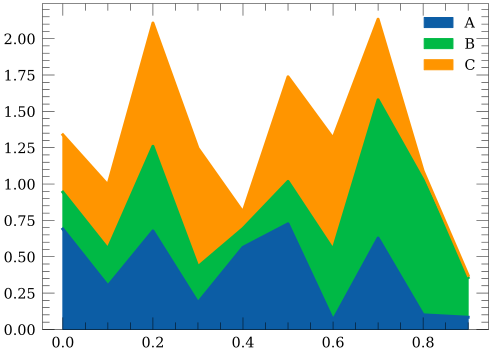

In [25]:
df = pd.DataFrame(np.random.rand(10, 3), columns=['A', 'B', 'C'],index=np.arange(0,1, 0.1))
df.plot.area()
df

<AxesSubplot:xlabel='C', ylabel='D'>

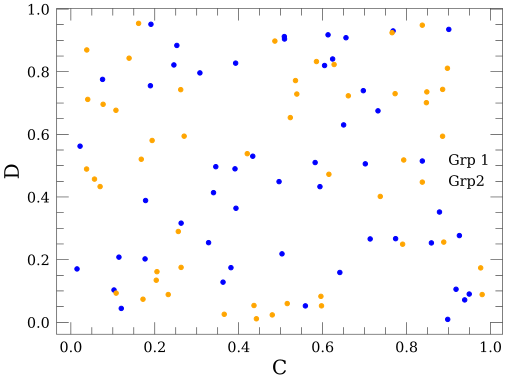

In [26]:
df_15 = pd.DataFrame(np.random.rand(50, 4),
                     columns=['A', 'B', 'C', 'D'])
ax = df_15.plot.scatter(x='A', y='B', color='blue',label="Grp 1")
df_15.plot.scatter(x='C', y='D', color="Orange", label='Grp2', ax=ax)